In [2]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [25]:
aldi = pd.read_excel('Tomatenexperiment.xlsx', 'Aldi')
aldi = aldi[['Name','Preis','Anzahl_Tomaten']]
aldi = aldi.dropna(axis=0)
aldi['Anzahl_Tomaten'] = aldi['Anzahl_Tomaten'].astype(int)
aldi

,Name,Preis,Anzahl_Tomaten
0,Mini-Roma-Rispentomaten,0.89,20
1,NATUR LIEBLINGE Rispentomaten 1000g,1.29,8
2,GUT BIO Bio-Tomaten,1.69,5
3,TOMA DOR Kirschtomaten,1.89,22
4,NATUR LIEBLINGE Deutsche Rispentomaten,1.99,5


In [26]:
lidl = pd.read_excel('Tomatenexperiment.xlsx', 'Lidl')
lidl

,Name,Preis,Anzahl_Tomaten
0,Cocktail Strauchtomaten,0.99,11
1,Bio - Cherry Strauchtomaten,1.79,26
2,Deutsche Strauchtomaten,1.49,8
3,Cherry Strauchtomaten,1.79,24
4,Bio - Strauchtomaten,1.99,7
5,Deutsche Cocktailstrauchtomaten,1.99,10
6,Bio - Cocktail Strauchtomaten,2.49,11
7,Deutsche Cherry Strauchtomaten,1.99,19
8,Deutsche Cherry Strauchtomaten gelb,1.99,21
9,Bio - miniromarispentomaten,2.99,42


In [27]:
kaufland = pd.read_excel('Tomatenexperiment.xlsx', 'Kaufland')
kaufland

,Name,Preis,Anzahl_Tomaten
0,Cherryrispentomaten rot,1.49,17
1,Cocktailrispentomaten Schale,1.69,14
2,Cherryrispentomaten Schale,2.49,24
3,Cocktailrispentomaten,1.99,9
4,Miniromarispentomaten,1.99,32
5,K-Bio Cocktailrispentomaten,2.79,11
6,Bio - Cherryrispentomaten,2.99,20
7,Rispentomatenschale,2.49,11


In [28]:
edeka = pd.read_excel('Tomatenexperiment.xlsx', 'Edeka')
edeka = edeka.dropna(axis=0)
edeka['Anzahl_Tomaten'] = edeka['Anzahl_Tomaten'].astype(int)
edeka

,Name,Preis,Anzahl_Tomaten
0,UH Rispentomaten,1.49,5
1,UH Cocktail-Rispentomaten,1.99,7
2,EDEKA ANNICO mini-Rispentomaten,1.99,10


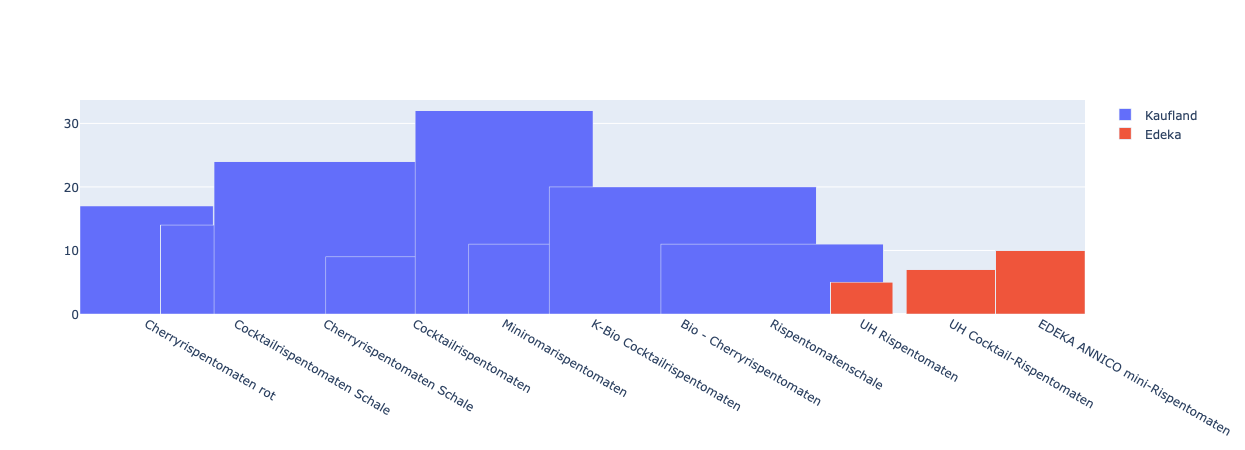

In [29]:
fig = go.Figure()
fig.add_trace(go.Bar(x=kaufland.Name, y=kaufland.Anzahl_Tomaten, name='Kaufland', width = kaufland.Preis))#, width=kaufland.Anzahl_Tomaten))
fig.add_trace(go.Bar(x=edeka.Name, y=edeka.Anzahl_Tomaten, name='Edeka', width = [0.7,1,1]))
#fig.update_layout(bargap = 1)

fig.show()

In [32]:
kaufland['markt']='Kaufland'
edeka['markt'] = 'Edeka'
lidl['markt'] = 'Lidl'
aldi['markt'] = 'Aldi'
frames = [kaufland,edeka,lidl,aldi]
alle = pd.concat(frames)
alle

,Name,Preis,Anzahl_Tomaten,markt
0,Cherryrispentomaten rot,1.49,17,Kaufland
1,Cocktailrispentomaten Schale,1.69,14,Kaufland
2,Cherryrispentomaten Schale,2.49,24,Kaufland
3,Cocktailrispentomaten,1.99,9,Kaufland
4,Miniromarispentomaten,1.99,32,Kaufland
5,K-Bio Cocktailrispentomaten,2.79,11,Kaufland
6,Bio - Cherryrispentomaten,2.99,20,Kaufland
7,Rispentomatenschale,2.49,11,Kaufland
0,UH Rispentomaten,1.49,5,Edeka
1,UH Cocktail-Rispentomaten,1.99,7,Edeka


In [33]:
alle=alle.sort_values(['Anzahl_Tomaten'],ascending=False)
alle

,Name,Preis,Anzahl_Tomaten,markt
9,Bio - miniromarispentomaten,2.99,42,Lidl
4,Miniromarispentomaten,1.99,32,Kaufland
1,Bio - Cherry Strauchtomaten,1.79,26,Lidl
2,Cherryrispentomaten Schale,2.49,24,Kaufland
3,Cherry Strauchtomaten,1.79,24,Lidl
3,TOMA DOR Kirschtomaten,1.89,22,Aldi
8,Deutsche Cherry Strauchtomaten gelb,1.99,21,Lidl
0,Mini-Roma-Rispentomaten,0.89,20,Aldi
6,Bio - Cherryrispentomaten,2.99,20,Kaufland
7,Deutsche Cherry Strauchtomaten,1.99,19,Lidl


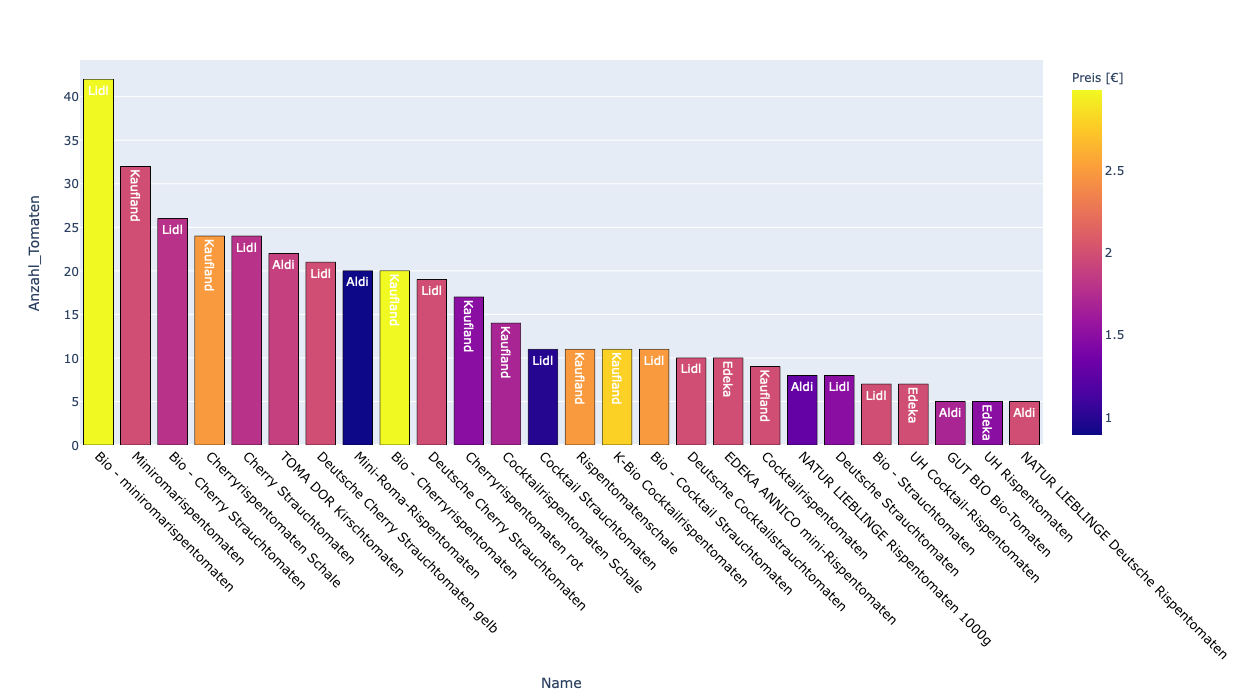

In [36]:
import plotly.express as px
fig = px.bar(alle, x="Name", y="Anzahl_Tomaten", color="Preis",text='markt',height=700, labels=dict(Preis = 'Preis [€]'))
fig.update_traces(marker_line_color='black')
fig.update_xaxes(tickangle=45,tickfont=dict(color='black', size=13)) 
fig.show()

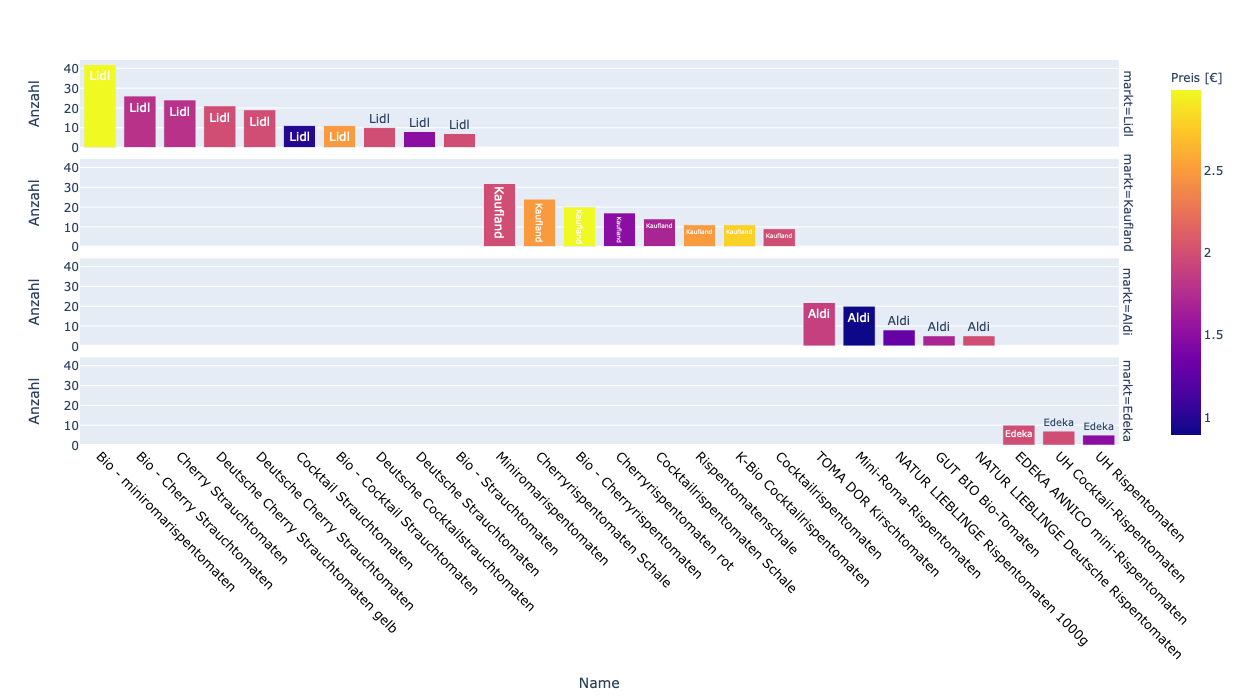

In [41]:
fig = px.bar(alle, x="Name", y="Anzahl_Tomaten", color="Preis",text="markt",height=700, 
             labels=dict(Preis = "Preis [€]",Anzahl_Tomaten='Anzahl'),facet_row=('markt') )
fig.update_xaxes(tickangle=45,tickfont=dict(color='black', size=13)) 
fig.show()